### Apply the 'gettig started' Turorial to our dataset (aggregation by week)

In [2]:
import pandas as pd
from fbprophet import Prophet

In [3]:
df = pd.read_csv('../../data/cleaned/weekseries_04_18.csv')
df.rename({'acc_nr':'y'}, axis=1, inplace=True)
len(df), df.head(), df.tail()

(783,            ds    y
 0  2004-01-04  142
 1  2004-01-11  263
 2  2004-01-18  291
 3  2004-01-25  222
 4  2004-02-01  277,              ds    y
 778  2018-12-02  261
 779  2018-12-09  274
 780  2018-12-16  275
 781  2018-12-23  234
 782  2018-12-30  150)

In [100]:
m = Prophet(yearly_seasonality=52) #daily_seasonality=True) #, weekly_seasonality=True)
m.add_country_holidays(country_name='US')
m.fit(df)
# m.train_holiday_names

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [101]:
future = m.make_future_dataframe(periods=20,freq='W',include_history=False)
future.head(2)

,ds
0,2019-01-06
1,2019-01-13


In [121]:
forecast = m.predict(future)
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Christmas Day,Christmas Day_lower,Christmas Day_upper,Christmas Day (Observed),...,holidays,holidays_lower,holidays_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2019-01-06,221.872914,171.937906,228.610143,221.872914,221.872914,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-22.920864,-22.920864,-22.920864,0.0,0.0,0.0,198.952050
1,2019-01-13,221.685540,195.891482,255.254308,221.685540,221.685540,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.254499,5.254499,5.254499,0.0,0.0,0.0,226.940039
2,2019-01-20,221.498165,170.819609,232.263884,221.498165,221.498165,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-20.460986,-20.460986,-20.460986,0.0,0.0,0.0,201.037179
3,2019-01-27,221.310791,160.787335,220.683819,221.310791,221.310791,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-28.752540,-28.752540,-28.752540,0.0,0.0,0.0,192.558251
4,2019-02-03,221.123416,182.021544,240.107494,221.123416,221.123416,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-8.524012,-8.524012,-8.524012,0.0,0.0,0.0,212.599405
5,2019-02-10,220.936041,162.812232,222.327051,220.936041,220.936041,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-28.239974,-28.239974,-28.239974,0.0,0.0,0.0,192.696068
6,2019-02-17,220.748667,165.294737,226.230169,220.748382,220.748667,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-26.080804,-26.080804,-26.080804,0.0,0.0,0.0,194.667863
7,2019-02-24,220.561292,142.400658,201.687153,220.550719,220.564726,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-47.293870,-47.293870,-47.293870,0.0,0.0,0.0,173.267422
8,2019-03-03,220.373918,176.450907,235.780337,220.343436,220.392101,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-13.259920,-13.259920,-13.259920,0.0,0.0,0.0,207.113998
9,2019-03-10,220.186543,168.653920,229.181766,220.135967,220.216510,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-20.229658,-20.229658,-20.229658,0.0,0.0,0.0,199.956886


In [102]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
15,2019-04-21,199.733478,170.575532,228.278724
16,2019-04-28,209.506701,180.767580,238.830311
17,2019-05-05,228.582764,199.331892,258.716620
18,2019-05-12,222.218234,191.859276,251.426638
19,2019-05-19,222.576230,194.161560,251.526898


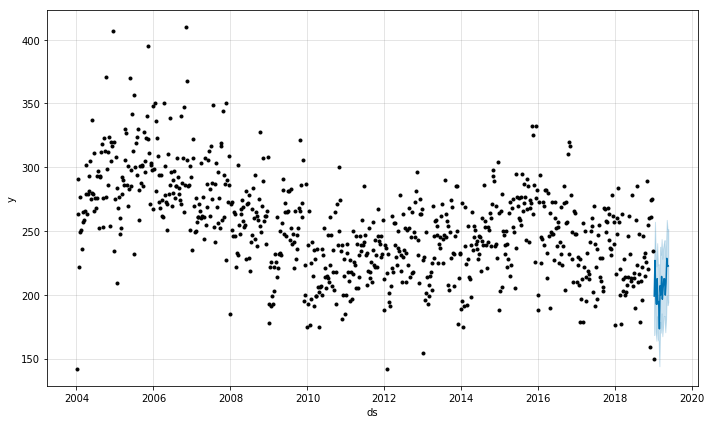

In [103]:
fig1 = m.plot(forecast)

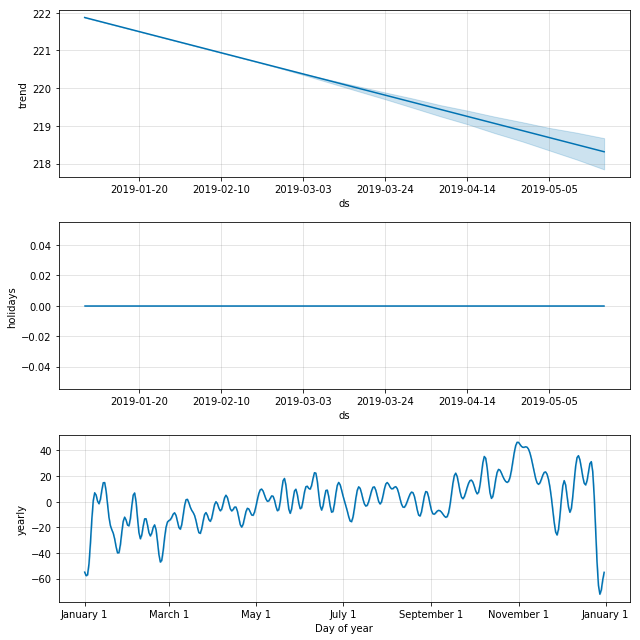

In [104]:
fig2 = m.plot_components(forecast)

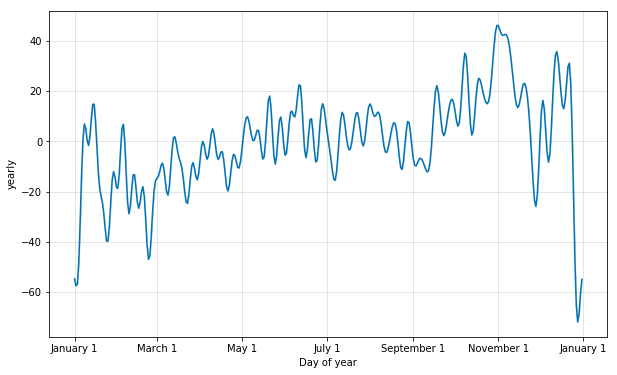

In [105]:
from fbprophet import plot as pl
a = pl.plot_yearly(m)

In [106]:
import matplotlib.pyplot as plt

baseline

In [107]:
y_act_18 = df['y'][-52:]
y_base_19 = [y_act_18.mean()]*20

In [114]:
x = forecast.index.values[:52]
y = forecast['yhat'][:52]
y_low = forecast['yhat_lower'][:52]
y_up = forecast['yhat_upper'][:52]

len(y)

20

In [115]:
df_act = pd.read_csv('../../data/cleaned/weekseries_19.csv')
yr = df_act.acc_nr.values[:20]

In [110]:
len(yr)

20

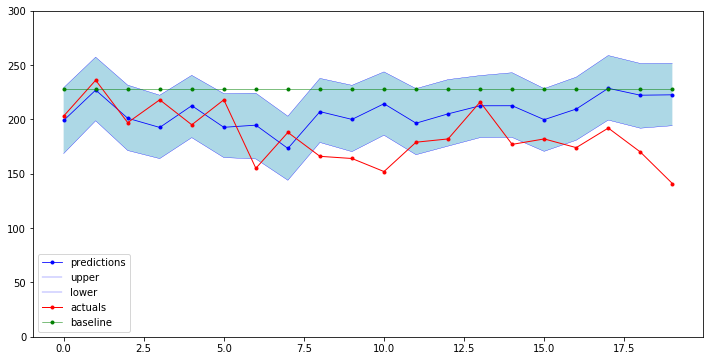

In [128]:
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(x,y, 'b.-', label='predictions', lw=0.8)
ax.plot(x,y_up, 'b-', label='upper', lw=0.3)
ax.plot(x,y_low, 'b-', label='lower', lw=0.3)
ax.fill_between(x, y_low, y_up, facecolor='lightblue')
ax.plot(x,yr, 'r.-', label='actuals', lw=1)
ax.plot(x,y_base_19, 'g.-', label='baseline', lw=0.5)
ax.set_ylim(0,300)
ax.legend()

In [112]:
from sklearn.metrics import mean_squared_error
print('MSE to actuals:', mean_squared_error(y,yr))
print('MSE to baseline:', mean_squared_error(y_base_19, yr))

MSE to actuals: 1239.2485042804478
MSE to baseline: 2397.138091715977


In [130]:
for i in range(1,len(yr)):
    print('MSE to actuals:', mean_squared_error(y[:i],yr[:i]))
    print('MSE to baseline:', mean_squared_error(y_base_19[:i], yr[:i]))

MSE to actuals: 16.385898866157042
MSE to baseline: 620.2015532544382
MSE to actuals: 49.23439803580496
MSE to baseline: 342.8746301775149
MSE to actuals: 38.25587111047672
MSE to baseline: 546.9323224852074
MSE to actuals: 190.51255225946974
MSE to baseline: 434.72078402366884
MSE to actuals: 214.35784976507753
MSE to baseline: 564.3092455621305
MSE to actuals: 285.34637169724544
MSE to baseline: 486.6053994082843
MSE to actuals: 469.37393610765656
MSE to baseline: 1176.371882924768
MSE to actuals: 437.83330035008714
MSE to baseline: 1228.3650147928997
MSE to actuals: 577.003026038247
MSE to baseline: 1517.6673652202503
MSE to actuals: 648.5924856072733
MSE to baseline: 1774.270784023669
MSE to actuals: 943.3004357389786
MSE to baseline: 2136.736518289403
MSE to actuals: 890.2156369299219
MSE to baseline: 2157.9739891518743
MSE to actuals: 862.6793710985166
MSE to baseline: 2154.065458579882
MSE to actuals: 801.9310021875586
MSE to baseline: 2010.325179628065
MSE to actuals: 832.66960

##### Rolling windows

In [84]:
df_act.set_index('ds', inplace=True)

In [85]:
rolling = df_act.rolling(5, center=True)

mean = rolling.mean()

ym = mean.acc_nr.values

In [ ]:
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(x,y, 'b.-', label='predictions', lw=0.5)
ax.plot(x,ym, 'r.-', label='actuals, smoothed', lw=0.5)
ax.set_ylim(0,300)
ax.legend()

In [ ]:
mean_squared_error(y[pd.notnull(ym)],ym[pd.notnull(ym)])

#### Smooth out both actuals and predictions

In [ ]:
fc_ds = forecast[['ds','yhat']][:52]
fc_ds.set_index('ds', inplace=True)

In [ ]:
rolling_fc = fc_ds.rolling(5, center=True)
mean_fc = rolling_fc.mean()
yfcm = mean_fc.yhat.values

In [ ]:
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(x,yfcm, 'b.-', label='predictions', lw=0.5)
ax.plot(x,ym, 'r.-', label='actuals, smoothed', lw=0.5)
ax.set_ylim(0,300)
ax.legend()

In [ ]:
mean_squared_error(yfcm[pd.notnull(ym)],ym[pd.notnull(ym)])

However, the mean is a better predictor:

In [17]:
ym[pd.notnull(ym)].mean()

NameError: name 'ym' is not defined

In [109]:
ys = [ym[pd.notnull(ym)].mean()]*len(ym[pd.notnull(ym)])

In [110]:
mean_squared_error(ys,ym[pd.notnull(ym)])

156.31692708333333